In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
loans = pd.read_csv("loan.csv")
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loans.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [4]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Data Cleansing
1. First keep relevant columns and remove unwanted columns.
    Note: To perform risk analysis, following columns are useful
    1. loan_amnt (column# 3)
    2. term (column# 6)
    3. int_rate (column# 7)
    4. installment (column# 8)
    5. emp_length (column# 12)
    6. home_ownership (column# 13)
    7. annual_inc(Column# 14)
    8. verification_status (column# 15)
    9. issue_d(column 16)
    10. loan_status (column# 17)
    11. purpose (column# 21)  
    12. dti (column# 25)
    12. delinq_2yrs (Column# 26)
    13. earliest_cr_line (column# 27)
    14. mths_since_last_delinq (column# 29)
    15. pub_rec (column#  32)
    16. revol_bal (column# 33)
    17. revol_util (column# 34)

2. Remove duplicate customers
3. Find NaN/Null values- remove/replace them
4. Find outliers and remove them

Perform Univariate Analysis on following columns(to be updated):
    1. Loan Purpose
    2. Loan Amount
    3. interest Rate
    4. Annual income
Perform Bivariate analysis on following(to be updated):
    1. Loan amount(loan_amnt 4) vs Annual income(annual_inc 14)
    2. Installement(installment 8) vs Annual Income(annual_inc 14)
    3. delinq_2yrs (column# 26) vs loan_status (column# 17)
    4. home_ownership (column# 13) vs loan_status (column# 17)
    5. emp_length (column# 12) vs loan_status (column# 17)
    6. purpose (column# 21) vs loan_status (column# 17)
    7. dti (column# 25) vs loan_status (column# 17)
    8. mths_since_last_delinq (column# 29) vs loan_status (column# 17)
    9. pub_rec (column# 32) vs loan_status (column# 17)
 

In [71]:
#keep only above columns- as, only 15 is to be kept compared to more than 100 to be dropped, better to write code to keep columns
loans_rsk = loans[['loan_amnt',
       'term',
       'int_rate',
       'installment',
       'emp_length',
       'home_ownership',
       'annual_inc',
       'verification_status',
       'issue_d',
       'loan_status',
       'purpose',
       'dti',
       'delinq_2yrs',
       'earliest_cr_line',
       'mths_since_last_delinq',
       'pub_rec',
       'revol_bal',
       'revol_util'
      ]]
loans_rsk.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,pub_rec,revol_bal,revol_util
0,5000,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,NaN,0,13648,83.70%
1,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,NaN,0,1687,9.40%
2,2400,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,NaN,0,2956,98.50%
3,10000,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,35.0,0,5598,21%
4,3000,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,Jan-96,38.0,0,27783,53.90%


In [72]:
#find Null values
loans_rsk.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
mths_since_last_delinq    25682
pub_rec                       0
revol_bal                     0
revol_util                   50
dtype: int64

In [73]:
#drop mths_since_last_delinq, as most of them have null
loans_rsk.drop(labels=['mths_since_last_delinq'],axis=1,inplace=True)
loans_rsk.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,pub_rec,revol_bal,revol_util
0,5000,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,0,13648,83.70%
1,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,0,1687,9.40%
2,2400,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,0,2956,98.50%
3,10000,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,0,5598,21%
4,3000,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,Jan-96,0,27783,53.90%


In [74]:
#replace Nan in emp_length to zero
loans_rsk['emp_length'] = loans_rsk['emp_length'].fillna(0)
loans_rsk.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,pub_rec,revol_bal,revol_util
0,5000,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,0,13648,83.70%
1,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,0,1687,9.40%
2,2400,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,0,2956,98.50%
3,10000,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,0,5598,21%
4,3000,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,Jan-96,0,27783,53.90%


In [75]:
# find data types of the new dataframe
loans_rsk.dtypes

loan_amnt                int64
term                    object
int_rate                object
installment            float64
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
delinq_2yrs              int64
earliest_cr_line        object
pub_rec                  int64
revol_bal                int64
revol_util              object
dtype: object

In [76]:
#and statistics
loans_rsk.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,pub_rec,revol_bal
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,324.561922,6.896893e+04,13.315130,0.146512,0.055065,13382.528086
std,7456.670694,208.874874,6.379377e+04,6.678594,0.491812,0.237200,15885.016641
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,3703.000000
50%,10000.000000,280.220000,5.900000e+04,13.400000,0.000000,0.000000,8850.000000
75%,15000.000000,430.780000,8.230000e+04,18.600000,0.000000,0.000000,17058.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,4.000000,149588.000000


In [77]:
#annual_inc column has some outliers- so remove the outliers. We would remove mean +- 3*std
loans_v1 = loans_rsk[np.abs(loans_rsk["annual_inc"] - loans_rsk["annual_inc"].mean()) <= (3*loans_rsk["annual_inc"].std() )]

In [78]:
loans_v1.describe()


,loan_amnt,installment,annual_inc,dti,delinq_2yrs,pub_rec,revol_bal
count,39428.000000,39428.000000,39428.000000,39428.000000,39428.000000,39428.000000,39428.000000
mean,11158.584635,322.738451,66025.261822,13.365032,0.145861,0.055341,13221.689941
std,7399.703434,206.943323,36433.688378,6.663834,0.490821,0.237784,15537.755366
min,500.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,166.500000,40000.000000,8.250000,0.000000,0.000000,3688.000000
50%,10000.000000,279.330000,58500.000000,13.460000,0.000000,0.000000,8815.000000
75%,15000.000000,427.165000,81500.000000,18.630000,0.000000,0.000000,16943.500000
max,35000.000000,1305.190000,260000.000000,29.990000,11.000000,4.000000,149588.000000


In [79]:
#int_rate column is not integer- remove %, and cast to integer
loans_v1['int_rate'] = loans_v1['int_rate'].str.rstrip('%').apply(pd.to_numeric)
#convert term to numeric
loans_v1['term'] = loans_v1['term'].str.rstrip('months').apply(pd.to_numeric)

In [80]:
#Derived Metrics: Insert a new column Defaulted (Defaulted/Not Defaulted). All cahrged off is defaulted. Current or fully paid are not defaulted
loans_v1['defaulted'] = loans_v1['loan_status'].apply(lambda x: 'Defaulted' if x=='Charged Off' else 'NotDefaulted') 

In [81]:
#Derived Metrics: Insert a new column that shows the % of monthly income paid as installement amount
loans_v1['instllmnt_prcntg'] = round(loans_v1['installment']/(loans_v1['annual_inc']/12)*100,2)

In [101]:
#Derived Metrics: Insert a new column that shows loan amount to Annual income Percentage
loans_v1['ln_amt_prcntg'] = round(loans_v1['loan_amnt']/loans_v1['annual_inc']*100,2)

In [123]:
#Derived Metrics- add new columns Month, date and year
loans_v1['issue_year'] = loans_v1['issue_d'].str.split("-", expand=True)[1]
loans_v1['issue_month'] = loans_v1['issue_d'].str.split("-", expand=True)[0]
#loans_v1['issue_day'] = pd.DatetimeIndex(loans_v1['issue_d']).day

In [124]:
loans_v1.describe()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,pub_rec,revol_bal,instllmnt_prcntg,ln_amt_prcntg
count,39428.000000,39428.000000,39428.000000,39428.000000,39428.000000,39428.000000,39428.000000,39428.000000,39428.000000,39428.000000,39428.000000
mean,11158.584635,42.411484,12.009849,322.738451,66025.261822,13.365032,0.145861,0.055341,13221.689941,6.614093,18.888635
std,7399.703434,10.619386,3.719832,206.943323,36433.688378,6.663834,0.490821,0.237784,15537.755366,3.991837,11.619947
min,500.000000,36.000000,5.420000,15.690000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.500000
25%,5500.000000,36.000000,9.250000,166.500000,40000.000000,8.250000,0.000000,0.000000,3688.000000,3.570000,10.000000
50%,10000.000000,36.000000,11.830000,279.330000,58500.000000,13.460000,0.000000,0.000000,8815.000000,5.840000,16.670000
75%,15000.000000,60.000000,14.540000,427.165000,81500.000000,18.630000,0.000000,0.000000,16943.500000,8.872500,25.320000
max,35000.000000,60.000000,24.590000,1305.190000,260000.000000,29.990000,11.000000,4.000000,149588.000000,32.030000,83.000000


In [109]:
#Derived Metrics(For ease of plotting): Insert a new column that creates buckets for instllmnt_prcntg(0-4, 5-9,10-14,15-19,20-29,30-34,35-39)
cut_labels = ['0-4', '5-9','10-14','15-19','20-29','30-34','35-39']
cut_bins = [0, 5, 10,15,20,25,30,35]
loans_v1['instllmnt_prcntg_bckt']= pd.cut(loans_v1['instllmnt_prcntg'], bins=cut_bins, labels=cut_labels)

In [125]:
loans_v1.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,revol_bal,revol_util,defaulted,instllmnt_prcntg,ln_amt_prcntg,instllmnt_prcntg_bckt,int_rate_bckt,ln_amt_prcntg_bckt,issue_year,issue_month
0,5000,36,10.65,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,...,13648,83.70%,NotDefaulted,8.14,20.83,5-9,10-14,21-30,11,Dec
1,2500,60,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,...,1687,9.40%,Defaulted,2.39,8.33,0-4,15-19,1-10,11,Dec
2,2400,36,15.96,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,...,2956,98.50%,NotDefaulted,8.26,19.59,5-9,15-19,11-20,11,Dec
3,10000,36,13.49,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,...,5598,21%,NotDefaulted,8.28,20.33,5-9,10-14,21-30,11,Dec
4,3000,60,12.69,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,...,27783,53.90%,NotDefaulted,1.02,3.75,0-4,10-14,1-10,11,Dec


In [111]:
#Derived Metrics(For ease of plotting): Insert a new column that creates buckets for interest rate
cut_labels = ['<5', '5-9','10-14','15-19','20-24','25+']
cut_bins = [0,5, 10, 15,20,25,30]
loans_v1['int_rate_bckt']= pd.cut(loans_v1['int_rate'], bins=cut_bins, labels=cut_labels)

In [126]:
loans_v1.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,revol_bal,revol_util,defaulted,instllmnt_prcntg,ln_amt_prcntg,instllmnt_prcntg_bckt,int_rate_bckt,ln_amt_prcntg_bckt,issue_year,issue_month
0,5000,36,10.65,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,...,13648,83.70%,NotDefaulted,8.14,20.83,5-9,10-14,21-30,11,Dec
1,2500,60,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,...,1687,9.40%,Defaulted,2.39,8.33,0-4,15-19,1-10,11,Dec
2,2400,36,15.96,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,...,2956,98.50%,NotDefaulted,8.26,19.59,5-9,15-19,11-20,11,Dec
3,10000,36,13.49,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,...,5598,21%,NotDefaulted,8.28,20.33,5-9,10-14,21-30,11,Dec
4,3000,60,12.69,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,...,27783,53.90%,NotDefaulted,1.02,3.75,0-4,10-14,1-10,11,Dec


In [113]:

#Derived Metrics(For ease of plotting): Insert a new column that creates buckets for ln_amt_prcntg(<1, 1-10, 10-20,20-30,30-40,40-50,50-60,60-70,80+)
cut_labels = ['<1', '1-10','11-20','21-30','31-40','41-50','51-60', '61-70','71-80', '80+']
cut_bins = [0,1, 10, 20,30,40,50,60,70,80,100]
loans_v1['ln_amt_prcntg_bckt']= pd.cut(loans_v1['ln_amt_prcntg'], bins=cut_bins, labels=cut_labels)

In [114]:
loans_v1.dtypes

loan_amnt                   int64
term                        int64
int_rate                  float64
installment               float64
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
pub_rec                     int64
revol_bal                   int64
revol_util                 object
defaulted                  object
instllmnt_prcntg          float64
ln_amt_prcntg             float64
instllmnt_prcntg_bckt    category
int_rate_bckt            category
ln_amt_prcntg_bckt       category
issue_year                 object
issue_month                object
dtype: object

In [127]:
loans_v1.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,revol_bal,revol_util,defaulted,instllmnt_prcntg,ln_amt_prcntg,instllmnt_prcntg_bckt,int_rate_bckt,ln_amt_prcntg_bckt,issue_year,issue_month
0,5000,36,10.65,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,...,13648,83.70%,NotDefaulted,8.14,20.83,5-9,10-14,21-30,11,Dec
1,2500,60,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,...,1687,9.40%,Defaulted,2.39,8.33,0-4,15-19,1-10,11,Dec
2,2400,36,15.96,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,...,2956,98.50%,NotDefaulted,8.26,19.59,5-9,15-19,11-20,11,Dec
3,10000,36,13.49,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,...,5598,21%,NotDefaulted,8.28,20.33,5-9,10-14,21-30,11,Dec
4,3000,60,12.69,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,...,27783,53.90%,NotDefaulted,1.02,3.75,0-4,10-14,1-10,11,Dec


### Univariate Analysis
Univariate analysis on following
1. Loan Amount
2. Loan Term
3. Emp_length
4. Home Ownership
5. Loan Status
6. Purpose

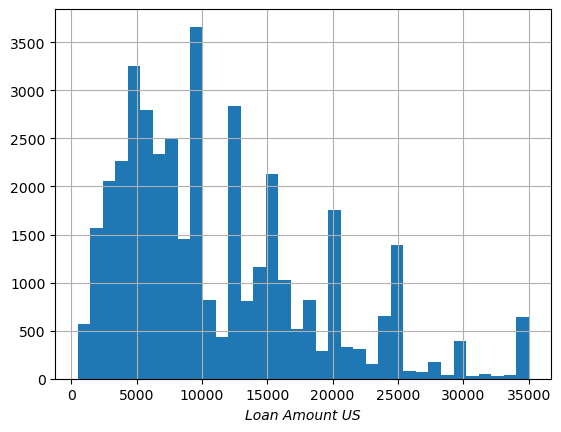

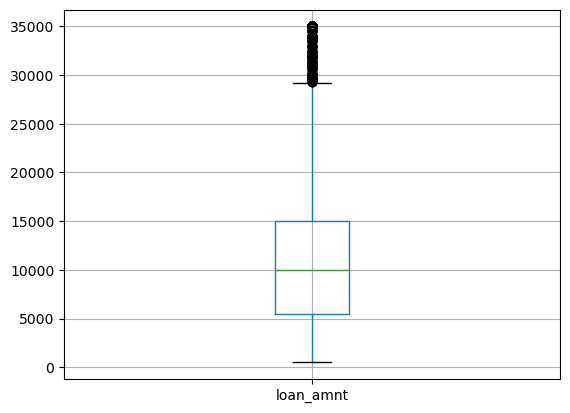

In [91]:
#Loan amount histogram
loans_v1['loan_amnt'].hist(bins=36)
#plt.hist(loans_v1['loan_amnt'], bins=36, density=True, color='b')
plt.xlabel('Loan Amount US', fontsize= 10, fontstyle='italic')
#plt.ylabel('Number of Loans', fontsize= 10, fontstyle='italic')
plt.show()
loans_v1.boxplot('loan_amnt')
plt.show()

##### Observation
Maximum % applicants taken loan of amount between 5000 to 15000

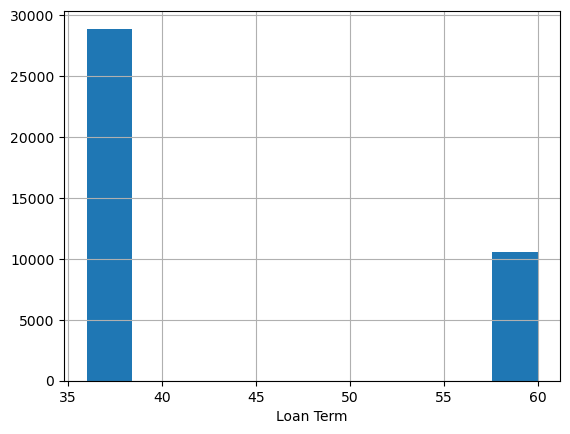

In [92]:
#Loan Term
loans_v1['term'].hist()
plt.xlabel('Loan Term')
plt.show()

##### Most applicants opt for 36 month loan tenure 

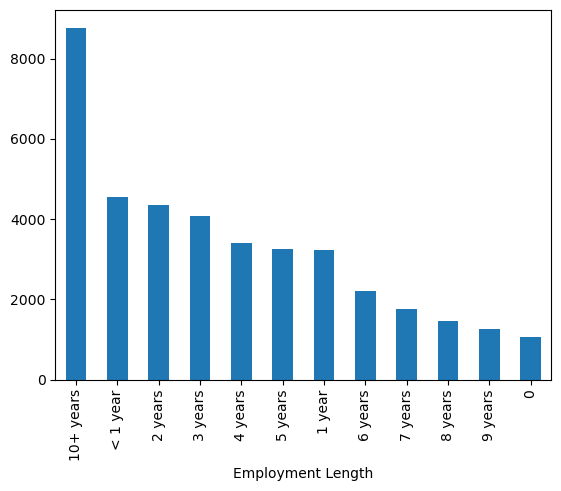

In [93]:
#Employment length graph
loans_v1['emp_length'].value_counts().plot(kind='bar')
plt.xlabel('Employment Length')
plt.show()

Employees with more than 10+ years of experience are taking more loans. 

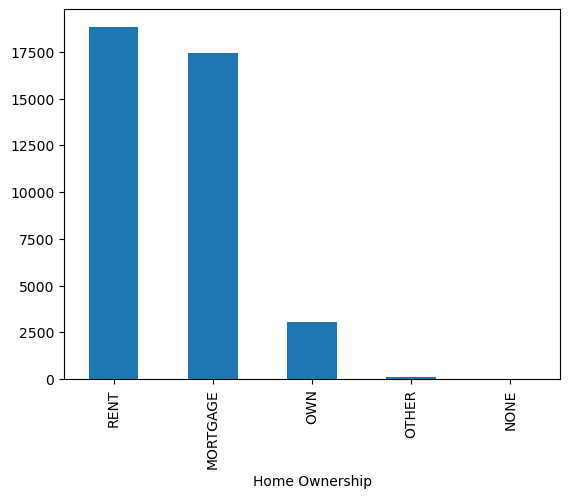

In [94]:
#Home ownership 
loans_v1['home_ownership'].value_counts().plot(kind='bar')
plt.xlabel('Home Ownership')
plt.show()

Above graph shows- % of home owners applying for loan is very less compared to Rent/Mortgage

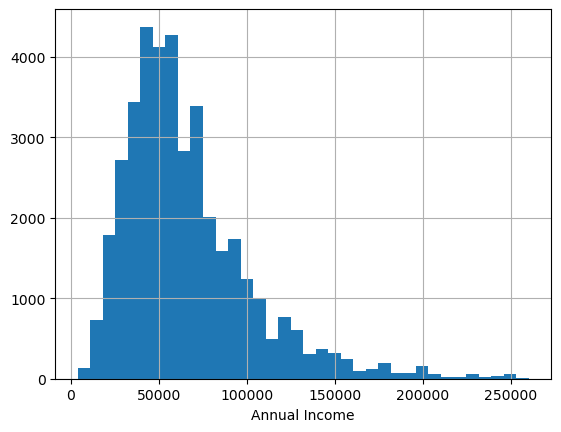

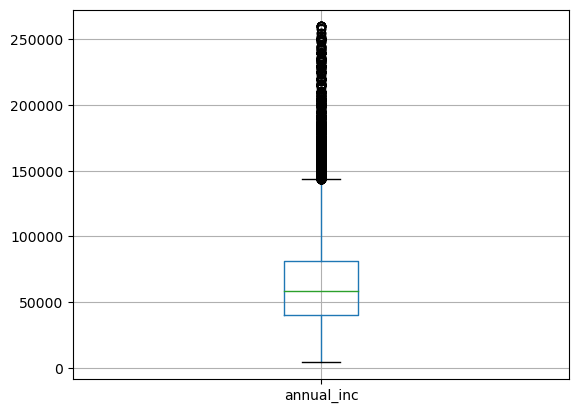

In [95]:
#Annual Income histogram
loans_v1['annual_inc'].hist(bins=36)
plt.xlabel('Annual Income')
#plt.hist(loans_v1['loan_amnt'], bins=36, density=True, color='b')
#plt.xlabel('Loan Amount US', fontsize= 10, fontstyle='italic')
#plt.ylabel('Number of Loans', fontsize= 10, fontstyle='italic')
plt.show()
loans_v1.boxplot('annual_inc')
plt.show()

Annual income of most applicants vary between 40000 to 80000

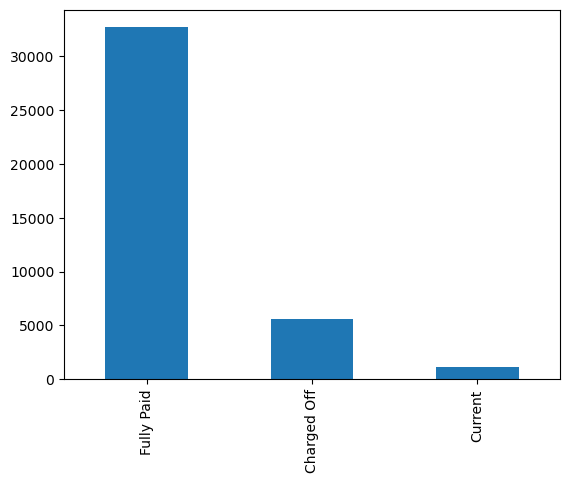

In [96]:
#Loan Status
loans_v1['loan_status'].value_counts().plot(kind='bar')
plt.show()

Most of the loans are fully paid.

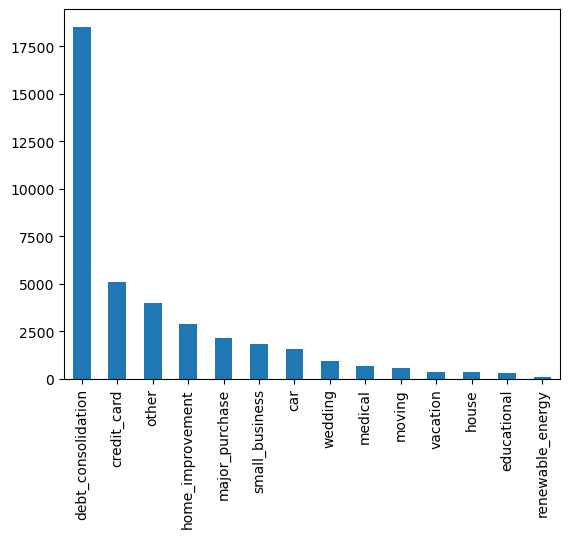

In [97]:
#purpose 
loans_v1['purpose'].value_counts().plot(kind='bar')
plt.show()

From above chart- most of the applicant are applying loan for debt-consolidations

In [116]:
loans_v1.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,revol_bal,revol_util,defaulted,instllmnt_prcntg,ln_amt_prcntg,instllmnt_prcntg_bckt,int_rate_bckt,ln_amt_prcntg_bckt,issue_year,issue_month
0,5000,36,10.65,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,...,13648,83.70%,NotDefaulted,8.14,20.83,5-9,10-14,21-30,Dec,11
1,2500,60,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,...,1687,9.40%,Defaulted,2.39,8.33,0-4,15-19,1-10,Dec,11
2,2400,36,15.96,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,...,2956,98.50%,NotDefaulted,8.26,19.59,5-9,15-19,11-20,Dec,11
3,10000,36,13.49,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,...,5598,21%,NotDefaulted,8.28,20.33,5-9,10-14,21-30,Dec,11
4,3000,60,12.69,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,...,27783,53.90%,NotDefaulted,1.02,3.75,0-4,10-14,1-10,Dec,11


### Bivariate Analysis
1. Loan amount percentage(derived column) vs defaulted(derived column) 
Home Ownership versus default

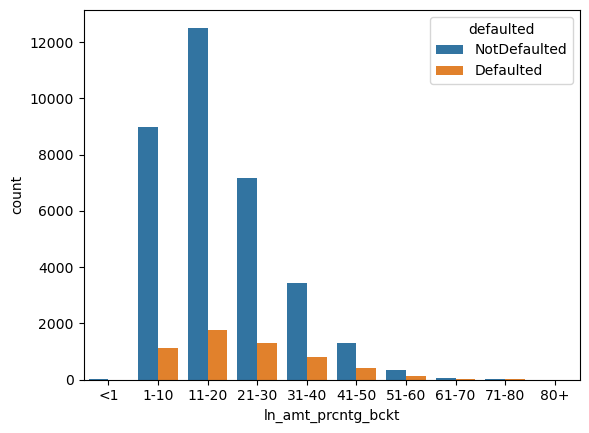

In [99]:
#Loan amount percentage bucket(derived column) vs defaulted(derived column) 
sns.countplot(loans_v1,
              x=loans_v1['ln_amt_prcntg_bckt'],
              hue =loans_v1['defaulted'])

plt.show()

From the above plot, we see, people with loan amount that varies between 11-20% of their annual income defaulted the most

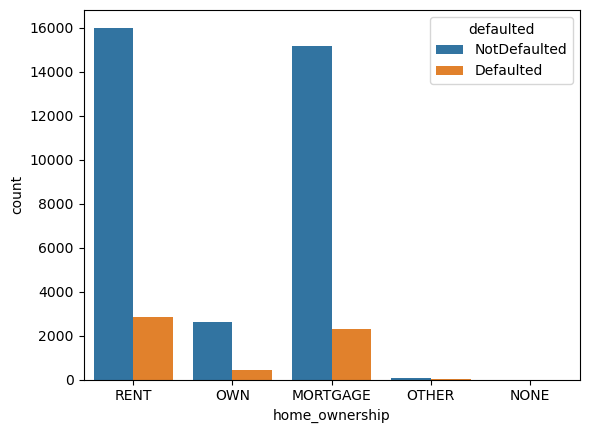

In [100]:
#Home Ownership vs defaulted(derived column) 
sns.countplot(loans_v1,
              x=loans_v1['home_ownership'],
              hue =loans_v1['defaulted'])

plt.show()

Applicants not owning a home has high default rate compared to home owners

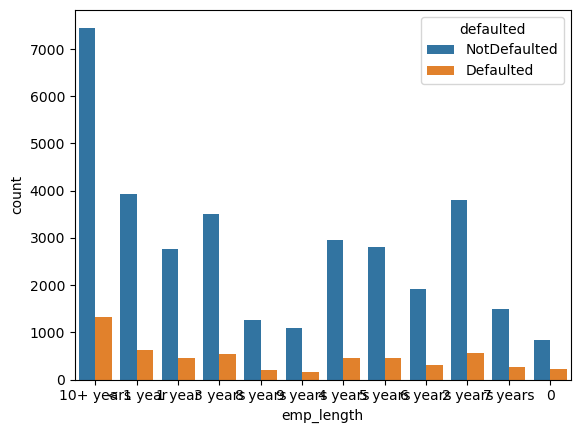

In [39]:
#emp_length vs defaulted(derived column) 
sns.countplot(loans_v1,
              x=loans_v1['emp_length'],
              hue =loans_v1['defaulted'])

plt.show()

People with 10+ years of experience has high default rate

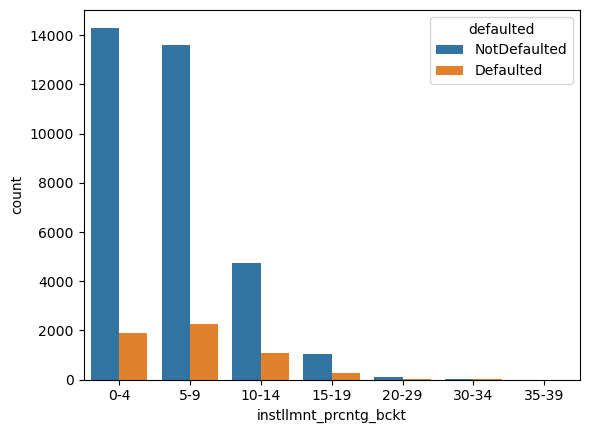

In [70]:
#Loan installement percentage bucketderived column) vs defaulted(derived column) 
sns.countplot(loans_v1,
              x=loans_v1['instllmnt_prcntg_bckt'],
              hue =loans_v1['defaulted'])

plt.show()

People with 5-9% of their total income defaulted the most

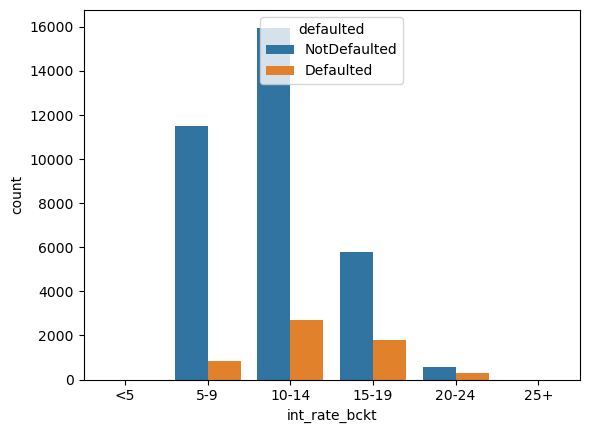

In [68]:
#Interest Rate bucket  vs defaulted(derived column) 
sns.countplot(loans_v1,
              x=loans_v1['int_rate_bckt'],
              hue =loans_v1['defaulted'])

plt.show()

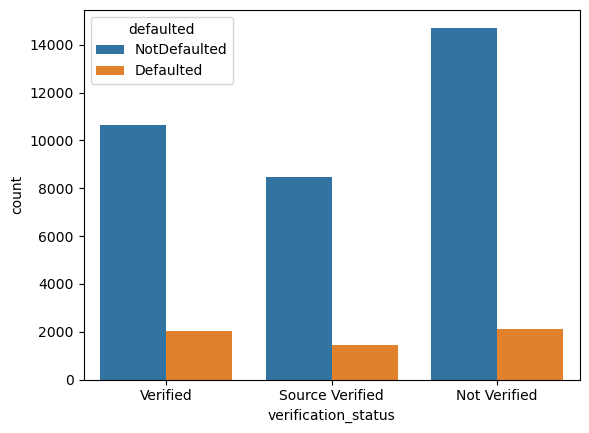

In [69]:
#verification_status vs defaulted
sns.countplot(loans_v1,
              x=loans_v1['verification_status'],
              hue =loans_v1['defaulted'])

plt.show()

Non verified employment status has higher chance of default

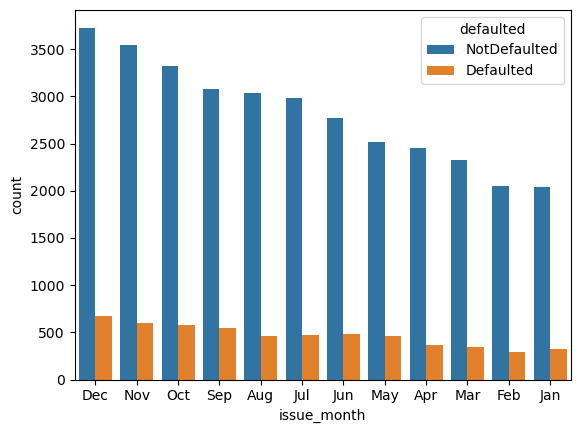

In [128]:
#Issue MOnth vs defaulted
sns.countplot(loans_v1,
              x=loans_v1['issue_month'],
              hue =loans_v1['defaulted'])

plt.show()

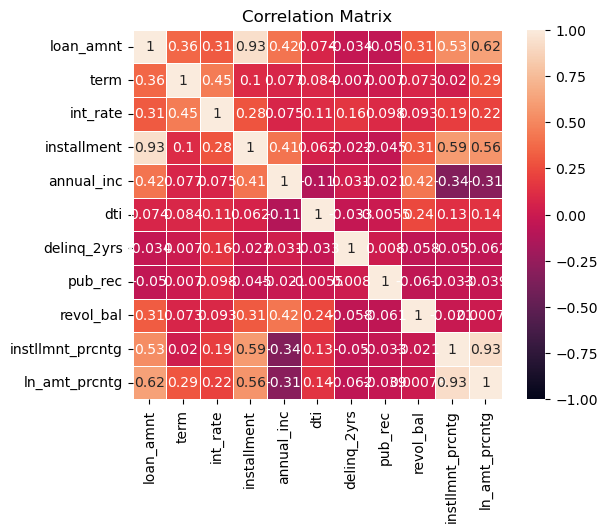

In [44]:
#Correlation matrix
sns.heatmap(loans_v1.corr(),vmin= -1, vmax=1,square=True, linewidths=.5,annot=True)
plt.title('Correlation Matrix')
plt.show()

Highest +ve correlation: Loan amount and installement, interest rate and term, Annual Income and Loan amount

##### Multivariate analysis

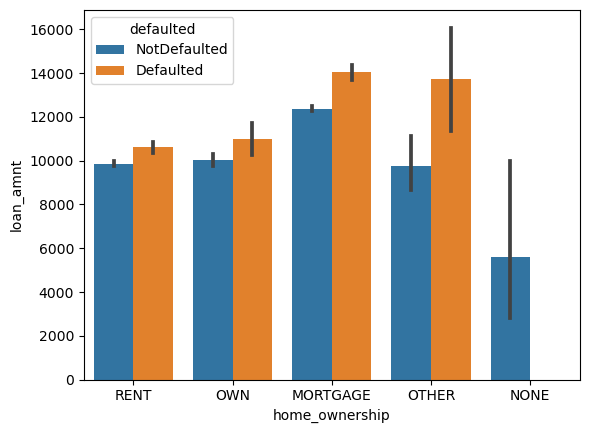

In [42]:
#Home ownership and loan moaunt's effect on default
sns.barplot(x='home_ownership',
            y='loan_amnt',
            hue ='defaulted',
            data =loans_v1)

plt.show()

From above plot, people with mortgage, and loan amount more than 12K has a high probablity of default. Also, renters, with more than 10K loan amount alos hihly likely to default.

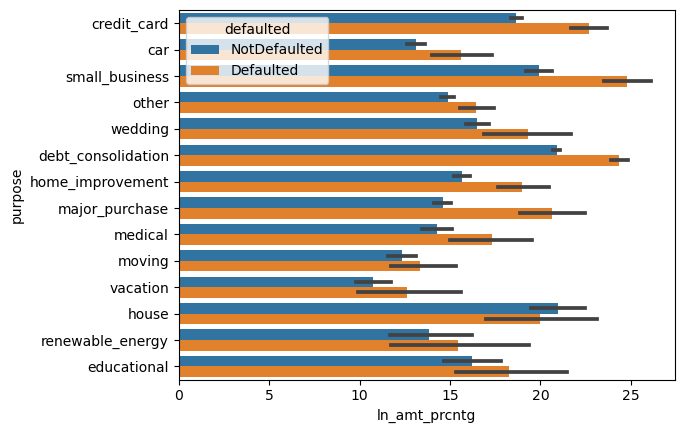

In [52]:
#Purpose and loan amount effect on Defailt
sns.barplot(x='ln_amt_prcntg',
            y='purpose',
            hue ='defaulted',
            data =loans_v1)

plt.show()

Credit Card, Small business, Debt collection-> these 3  type of loans, with more than 15 to 17% of loan amount percentage are more likely to default

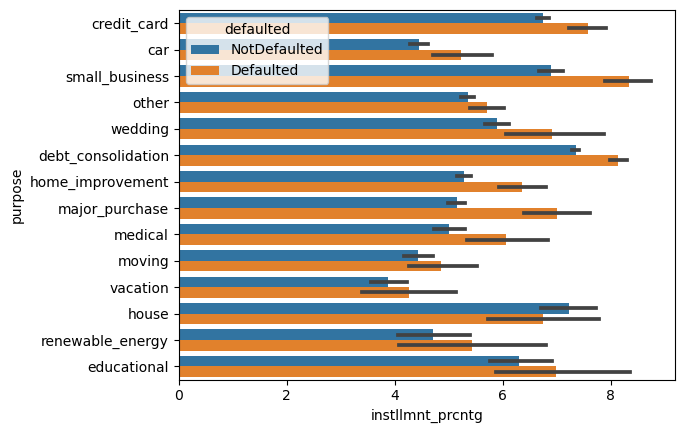

In [55]:
#Purpose and installment amount effect on Defailt
sns.barplot(x='instllmnt_prcntg',
            y='purpose',
            hue ='defaulted',
            data =loans_v1)

plt.show()

Credit Card, Small business, Debt collection-> these 3  type of loans, with more than 7 to 8% of installement are more likely to default

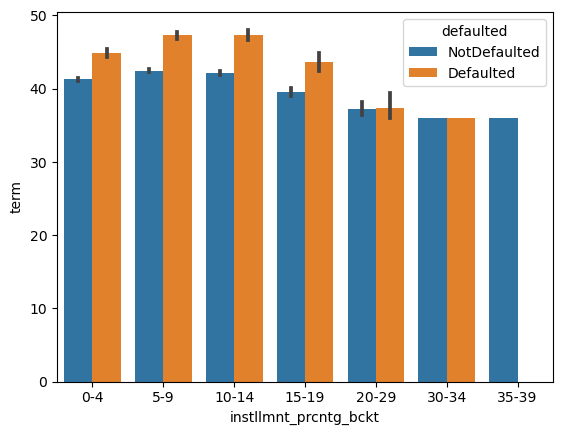

In [56]:
sns.barplot(x='instllmnt_prcntg_bckt',
            y='term',
            hue ='defaulted',
            data =loans_v1)

plt.show()

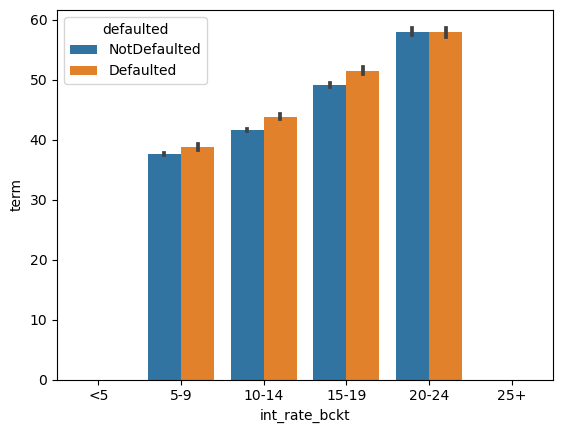

In [57]:
sns.barplot(x='int_rate_bckt',
            y='term',
            hue ='defaulted',
            data =loans_v1)

plt.show()

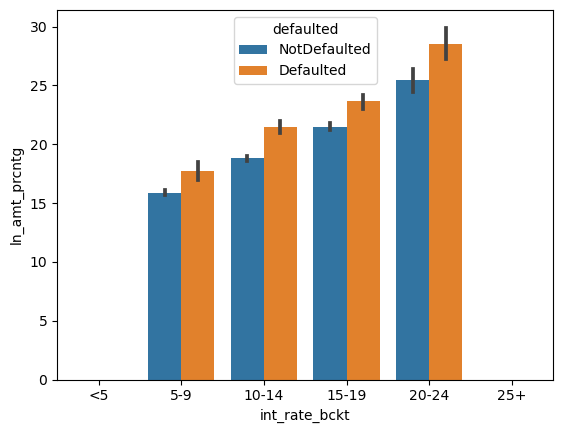

In [60]:
sns.barplot(x='int_rate_bckt',
            y='ln_amt_prcntg',
            hue ='defaulted',
            data =loans_v1)

plt.show()

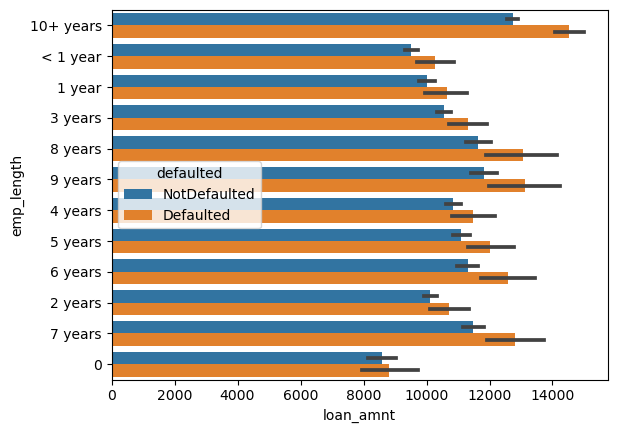

In [138]:
sns.barplot(x='loan_amnt',
            y='emp_length',
            hue ='defaulted',
            data =loans_v1)

plt.show()

Interest rate over 12 are defaulting- irrespective of employment length

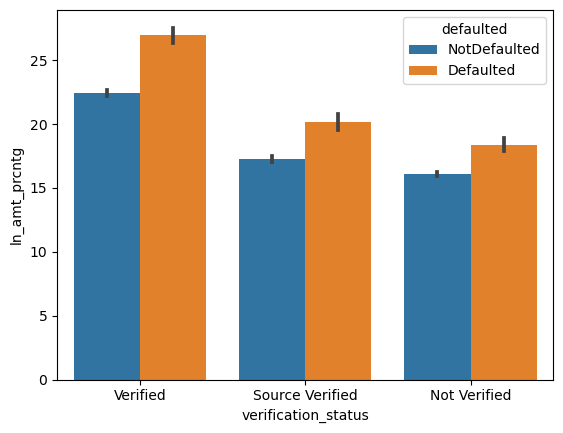

In [135]:
sns.barplot(x='verification_status',
            y='ln_amt_prcntg',
            hue ='defaulted',
            data =loans_v1)

plt.show()